## Importing Essential Libraries and Modules

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
np_cache_dir = os.path.join('.', 'numpy_cache')
csv_cache_dir = os.path.join('.', 'csv_cache')

In [3]:
rn_wine = pd.read_csv(os.path.join(csv_cache_dir, 'red_clean.csv'), sep='\t').drop(['Unnamed: 0'], axis=1)
rn_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
rn_wine.columns[:-1]

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol'],
      dtype='object')

In [8]:
rn_wine_X = rn_wine.drop(['quality'], axis=1).values
rn_wine_X_normed = np.load(os.path.join(np_cache_dir, 'red_clean_X_normed.npy'))
rn_wine_y = np.load(os.path.join(np_cache_dir, 'red_clean_y.npy'))

In [23]:
def quality_labels(y):
    if y <= 4:
        return -1
    elif y <= 6:
        return 0
    else:
        return 1

In [24]:
rn_wine_y = np.array(list(map(quality_labels, rn_wine_y)))

In [25]:
from tqdm import tqdm,tqdm_notebook
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=100)

In [26]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

for train_index, test_index in tqdm_notebook(rkf.split(rn_wine_X)):
    x_train, x_test = rn_wine_X[train_index], rn_wine_X[test_index]
    y_train, y_test = rn_wine_y[train_index], rn_wine_y[test_index]
    
    clf = clf.fit(x_train, y_train)
    
    accuracy = clf.score(x_test, y_test)
    print ("Accuracy: {}%".format(int(round(accuracy * 100))))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

Accuracy: 85%
Accuracy: 86%
Accuracy: 86%
Accuracy: 87%
Accuracy: 84%
Accuracy: 85%
Accuracy: 83%
Accuracy: 80%
Accuracy: 85%
Accuracy: 86%
Accuracy: 82%
Accuracy: 84%
Accuracy: 84%
Accuracy: 87%
Accuracy: 84%
Accuracy: 84%
Accuracy: 81%
Accuracy: 84%
Accuracy: 85%
Accuracy: 82%
Accuracy: 83%
Accuracy: 80%
Accuracy: 86%
Accuracy: 87%
Accuracy: 82%



In [27]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("red wine") 

'red wine.pdf'

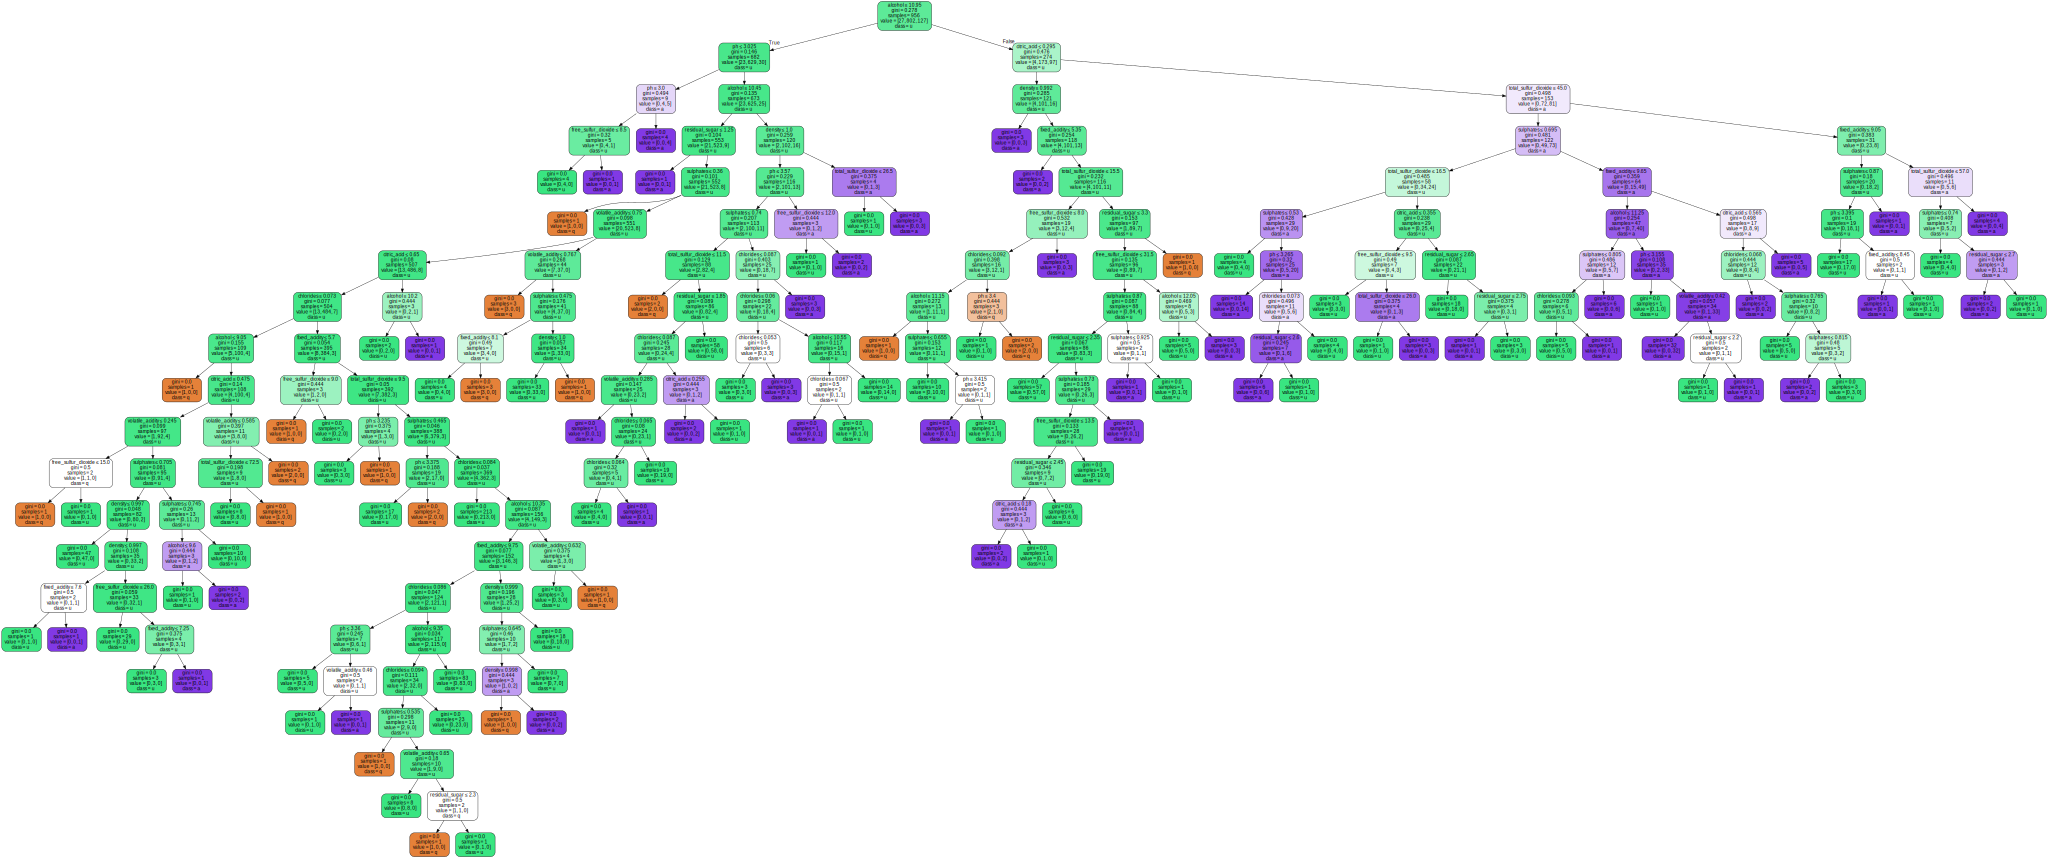

In [28]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=rn_wine.columns[:-1],  
                         class_names=rn_wine.columns[-1],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 